In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score

In [13]:
data = pd.read_csv('rfm.csv')
data.head()
# data.info()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = data.drop('CustomerID', axis=1)
rfm_scaled = scaler.fit_transform(data)

In [25]:
inertia = []
K = range(1, 11)
for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(rfm_scaled) 
    inertia.append(kmeans.inertia_)

In [26]:
print(inertia)

[17351.999999999996, 11112.246365278454, 6918.860672869189, 5697.175981364871, 4645.621956329765, 3376.078963546925, 2672.175399119371, 2542.4646486967586, 2329.262720605685, 2056.373404802468]


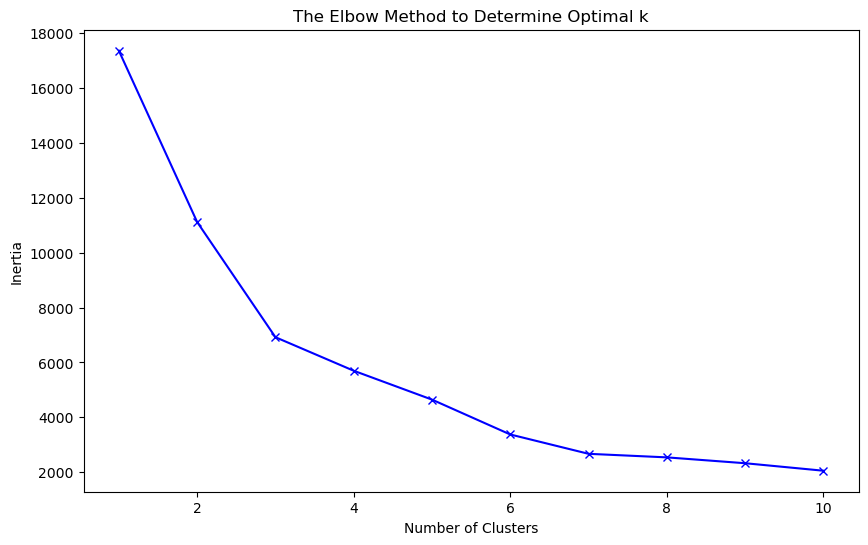

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method to Determine Optimal k')
plt.show()

In [41]:

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [42]:
cluster_analysis = data.groupby('Cluster').mean()

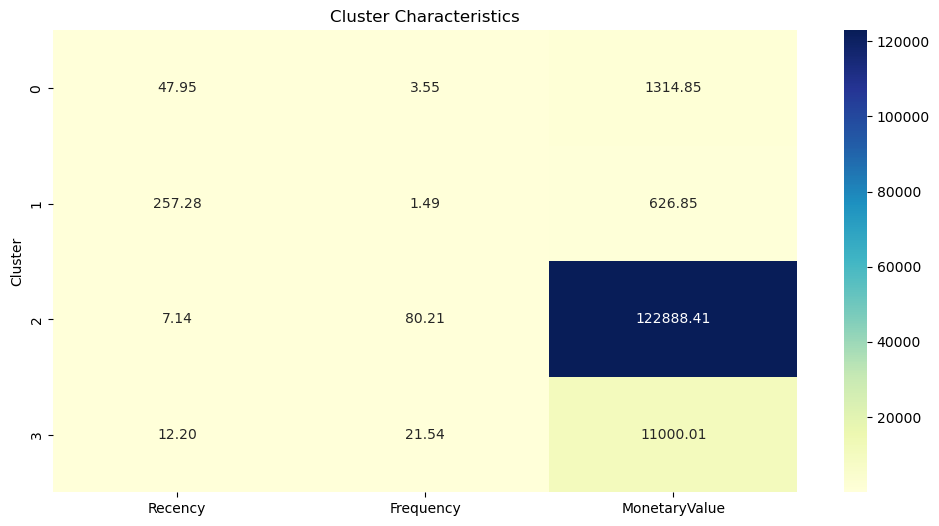

In [43]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_analysis, annot=True, fmt=".2f", cmap="YlGnBu") 
plt.title('Cluster Characteristics')
plt.show()

In [44]:
clusters_summary = { 
                    0: { "Name": "new Customers", "Marketing Efforts": "Loyalty programs, exclusive offers, and personalized communication." 
                        },
                    1: { "Name": "high risk", "Marketing Efforts": "Loyalty programs, exclusive offers, and personalized communication." 
                        },
                    2: { "Name": "vip customer", "Marketing Efforts": "Loyalty programs, exclusive offers, and personalized communication." 
                        },
                    3: { "Name": "loyal customer", "Marketing Efforts": "Loyalty programs, exclusive offers, and personalized communication." 
                        },
                    }
for cluster, details in clusters_summary.items():
    print(f"Cluster {cluster}: {details['Name']}") 
    print(f" Marketing Efforts: {details['Marketing Efforts']}\n")
    print(cluster_analysis)

Cluster 0: new Customers
 Marketing Efforts: Loyalty programs, exclusive offers, and personalized communication.

            Recency  Frequency  MonetaryValue
Cluster                                      
0         47.947687   3.554386    1314.851959
1        257.278756   1.493264     626.847783
2          7.142857  80.214286  122888.407143
3         12.200893  21.540179   11000.005357
Cluster 1: high risk
 Marketing Efforts: Loyalty programs, exclusive offers, and personalized communication.

            Recency  Frequency  MonetaryValue
Cluster                                      
0         47.947687   3.554386    1314.851959
1        257.278756   1.493264     626.847783
2          7.142857  80.214286  122888.407143
3         12.200893  21.540179   11000.005357
Cluster 2: vip customer
 Marketing Efforts: Loyalty programs, exclusive offers, and personalized communication.

            Recency  Frequency  MonetaryValue
Cluster                                      
0         47.947687